# 카드소비 패턴 분석 시각화 경진대회

이번 데이콘 베이직 서머 시각화 대회는 카드 소비 데이터를 이용하여 

소비 트렌드 및 소비 패턴을 효과적으로 분석 시각화를 하는 대회입니다.

시각화 대회인 만큼 **탐색적 자료 분석(EDA, Exporatory Data Analysis)** 을 진행하여

데이터에서 인사이트를 발굴해 보도록 하겠습니다.

### 라이브러리 Import

In [15]:
# 데이터 프레임 생성을 위한 라이브러리
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

## 1. 블록별 성별연령대별 카드소비패턴

블록별 성별연령대별 카드소비패턴.csv 부터 살펴보도록 하겠습니다.

In [2]:
df1 = pd.read_csv('data/블록별 성별연령대별 카드소비패턴.csv', encoding='cp949')
df1

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,SS013,201906,14037,F,50대,48288,65
1,SS048,201608,156830,M,30대,132792,10
2,SS016,202009,32925,M,50대,100600,25
3,SS001,201805,214245,F,30대,213876,40
4,SS044,201705,279472,M,30대,155930,5
...,...,...,...,...,...,...,...
495,SS012,201709,11449,F,30대,75450,45
496,SS044,201707,353037,F,30대,118708,25
497,SS054,201901,418149,F,20대,1056300,15
498,SS021,202009,269015,F,70대이상,25150,5


이번 데이터에서는 

성별(GEDNER), 연령대별(AGE), 카드이용금액계(AMT_CORR), 카드이용건수계(USECT_CORR)

열을 이용하여 자료 분석을 해보겠습니다.

연령대를 분석하기 위하여 데이터프레임의 '연령대별(AGE)' 열을 정수형으로 바꾸겠습니다.

In [9]:
def change_age(text:str):
    return text[:2]

df1['연령대별(AGE)'] = df1['연령대별(AGE)'].map(change_age).astype(int)
df1

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,SS013,201906,14037,F,50,48288,65
1,SS048,201608,156830,M,30,132792,10
2,SS016,202009,32925,M,50,100600,25
3,SS001,201805,214245,F,30,213876,40
4,SS044,201705,279472,M,30,155930,5
...,...,...,...,...,...,...,...
495,SS012,201709,11449,F,30,75450,45
496,SS044,201707,353037,F,30,118708,25
497,SS054,201901,418149,F,20,1056300,15
498,SS021,202009,269015,F,70,25150,5


### 1.1. 성별에 따른 카드이용금액합계와 카드이용건수계

여성의 경우 남성보다 카드를 더 많이 자주 이용하지만,

이용금액은 남성이 더 많은 것을 알 수 있습니다.

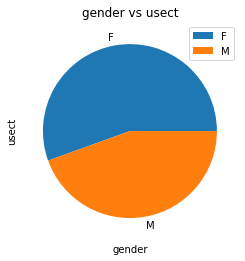

In [13]:
# 이용 건수

x = df1.groupby(by='성별(GEDNER)').sum().index
y = df1.groupby(by='성별(GEDNER)').sum()['카드이용건수계(USECT_CORR)']
plt.title('gender vs usect')
plt.xlabel('gender')
plt.ylabel('usect')
plt.pie(y, labels=x.values)
plt.legend()
plt.show()

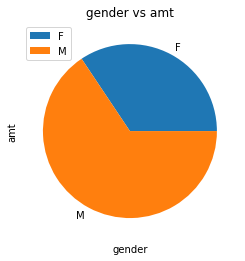

In [14]:
# 이용 금액

x = df1.groupby(by='성별(GEDNER)').sum().index
y = df1.groupby(by='성별(GEDNER)').sum()['카드이용금액계(AMT_CORR)']
plt.title('gender vs amt')
plt.xlabel('gender')
plt.ylabel('amt')
plt.pie(y, labels=x.values)
plt.legend()
plt.show()

### 1.2. 연령에 따른 카드이용건수계와 이용금액합계

40,50대가 카드를 제일 많이 이용하지만

카드이용금액은 20대가 가장 많은 것을 알 수 있습니다.

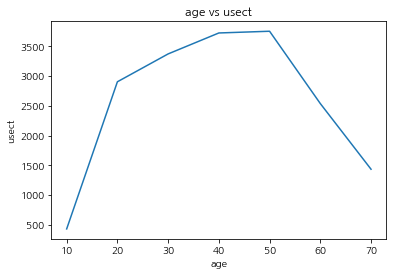

In [41]:
x = df1.groupby(by='연령대별(AGE)').sum().index
y = df1.groupby(by='연령대별(AGE)').sum()['카드이용건수계(USECT_CORR)']
plt.title('age vs usect')
plt.xlabel('age')
plt.ylabel('usect')
plt.plot(x,y)
plt.show()

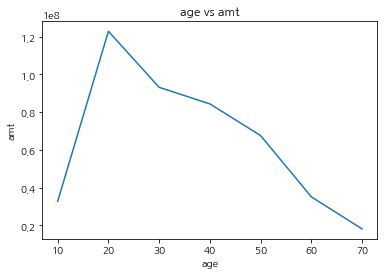

In [42]:
x = df1.groupby(by='연령대별(AGE)').sum().index
y = df1.groupby(by='연령대별(AGE)').sum()['카드이용금액계(AMT_CORR)']
plt.title('age vs amt')
plt.xlabel('age')
plt.ylabel('amt')
plt.plot(x,y)
plt.show()

## 2. 블록별 시간대별소액결제건수 카드소비패턴

'블록별 시간대별소액결제건수 카드소비패턴.csv' 를 살펴보겠습니다.

In [36]:
df2 = pd.read_csv('data/블록별 시간대별소액결제건수 카드소비패턴.csv', encoding='cp949')
df2

,서울시민업종코드(UPJONG_CD),기준년월(YM),시간대구간(TIME),고객주소블록코드(BLOCK_CD),카드이용금액계(AMT_CORR),소액결제건수(MICRO_PYM)
0,SS017,202006,6,11063,257,25
1,SS013,201608,6,216137,86,10
2,SS016,201802,3,224819,35,15
3,SS055,201906,2,19869,10,0
4,SS038,201612,5,28382,10,5
...,...,...,...,...,...,...
495,SS017,201911,5,366735,5,5
496,SS016,201803,2,155750,10,30
497,SS081,202103,3,366426,5,5
498,SS069,201707,3,214935,70,10


이번 데이터에서는 

시간대구간(TIME), 카드이용금액계(AMT_CORR), 소액결제건수(MICRO_PYM)

열을 이용하여 자료 분석을 해보겠습니다.

### 2.1. 시간대별 카드이용금액계와 소액결제건수

카드이용금액은 오후 시간대에 가장 크지만

점심시간에 소액결제건수가 가장 많은 것을 알 수 있습니다.

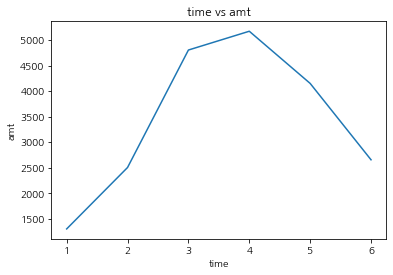

In [40]:
x = df2.groupby(by='시간대구간(TIME)').sum().index
y = df2.groupby(by='시간대구간(TIME)').sum()['카드이용금액계(AMT_CORR)']
plt.title('time vs amt')
plt.xlabel('time')
plt.ylabel('amt')
plt.plot(x,y)
plt.show()

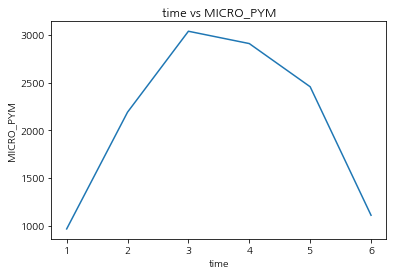

In [39]:
x = df2.groupby(by='시간대구간(TIME)').sum().index
y = df2.groupby(by='시간대구간(TIME)').sum()['소액결제건수(MICRO_PYM)']
plt.title('time vs MICRO_PYM')
plt.xlabel('time')
plt.ylabel('MICRO_PYM')
plt.plot(x,y)
plt.show()

## 3. 집계구별 일별소비지역별 카드소비패턴

In [13]:
df3 = pd.read_csv('data/집계구별 일별소비지역별 카드소비패턴.csv', encoding='cp949')
df3

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,서울,강남구,전자상거래,20201021,1123077020119,251500,25
1,서울,관악구,요식/유흥,20170312,1112052010107,158445,20
2,서울,마포구,주유,20161205,1113068050004,8048,15
3,서울,동작구,의료,20201210,1105066020601,22635,5
4,서울,NaN,가정생활/서비스,20210216,1117052020001,65390,10
...,...,...,...,...,...,...,...
495,서울,종로구,가전/가구,20201108,1120055030005,55330,10
496,부산,부평구,의료,20180901,1122058020102,853591,5
497,서울,강남구,유통,20160326,1123064020008,2052240,5
498,서울,서초구,스포츠/문화/레저,20160804,1124061010014,22635,5


이번 데이터에서는

가맹점주소광역시도(SIDO), 가맹점주소시군구(SGG), 카드이용금액계(AMT_CORR), 카드이용건수계(USECT_CORR)

열을 이용하여 자료 분석을 해보겠습니다.

### 3.1. 지역별 카드이용건수계와 카드이용금액계

서울, 그다음 경기가 이용건수와 이용금액이 가장 많은 것을 알 수 있습니다.

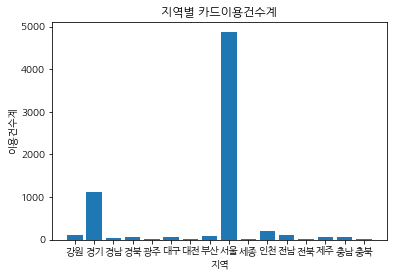

In [17]:
x = df3.groupby(by= '가맹점주소광역시도(SIDO)').sum().index
y = df3.groupby(by= '가맹점주소광역시도(SIDO)').sum()['카드이용건수계(USECT_CORR)']
plt.title('지역별 카드이용건수계')
plt.xlabel('지역')
plt.ylabel('이용건수계')
plt.bar(x,y)
plt.show()

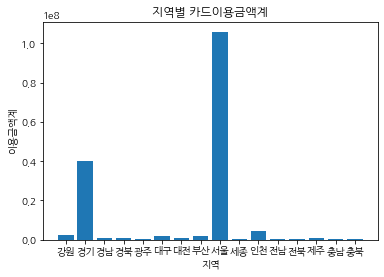

In [16]:
x = df3.groupby(by= '가맹점주소광역시도(SIDO)').sum().index
y = df3.groupby(by= '가맹점주소광역시도(SIDO)').sum()['카드이용금액계(AMT_CORR)']
plt.title('지역별 카드이용금액계')
plt.xlabel('지역')
plt.ylabel('이용금액계')
plt.bar(x,y)
plt.show()

### 3.2. 서울시 구별 카드이용건수계와 카드이용금액계

이용건수계는 마포구가 가장 많지만,

이용금액계는 강남구가 가장 큰 것을 알 수 있습니다.

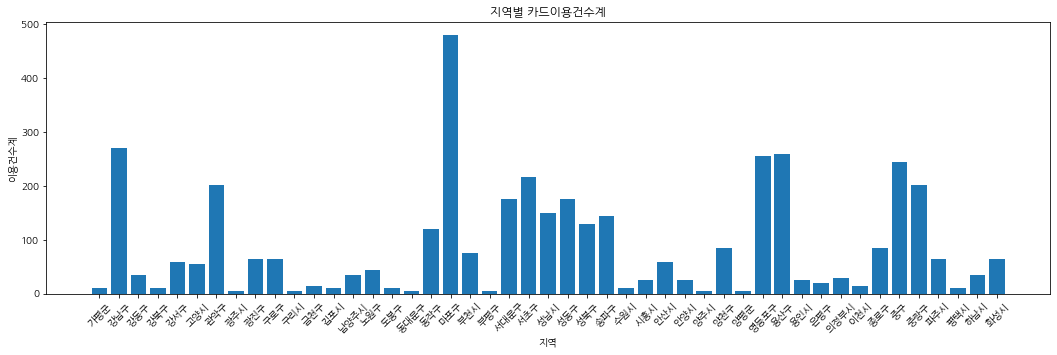

In [34]:
x = df3[df3['가맹점주소광역시도(SIDO)'] == '서울'].groupby(by= '가맹점주소시군구(SGG)').sum().index
y = df3[df3['가맹점주소광역시도(SIDO)'] == '서울'].groupby(by= '가맹점주소시군구(SGG)').sum()['카드이용건수계(USECT_CORR)']
plt.figure(figsize = (18,5))
plt.title('지역별 카드이용건수계')
plt.xlabel('지역')
plt.xticks(rotation=45)
plt.ylabel('이용건수계')
plt.bar(x,y)
plt.show()

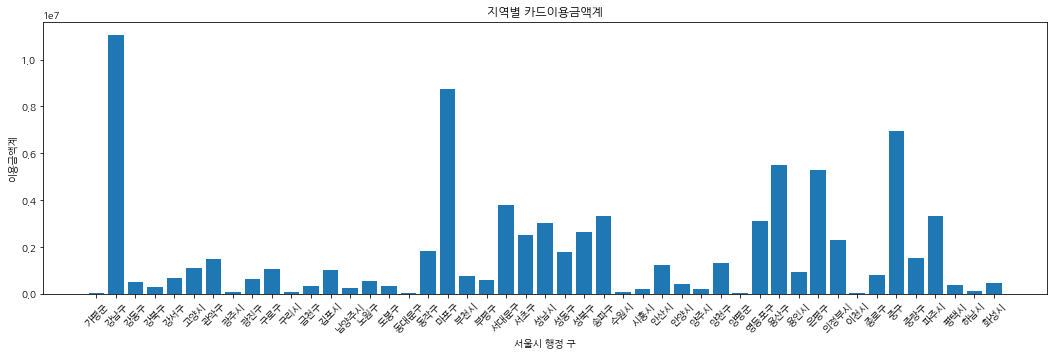

In [33]:
x = df3[df3['가맹점주소광역시도(SIDO)'] == '서울'].groupby(by= '가맹점주소시군구(SGG)').sum().index
y = df3[df3['가맹점주소광역시도(SIDO)'] == '서울'].groupby(by= '가맹점주소시군구(SGG)').sum()['카드이용금액계(AMT_CORR)']
plt.figure(figsize = (18,5))
plt.title('지역별 카드이용금액계')
plt.xlabel('서울시 행정 구')
plt.xticks(rotation=45)
plt.ylabel('이용금액계')
plt.bar(x,y)
plt.show()



## 4. 집계구별 일별시간대별 카드소비패턴

In [35]:
df4 = pd.read_csv('data/집계구별 일별시간대별 카드소비패턴.csv', encoding='cp949')
df4

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,요식/유흥,20161004,6,1123076010009,104624,10
1,유통,20210303,5,1122060030003,382592,20
2,유통,20170606,6,1123066022301,341688,5
3,스포츠/문화/레저,20171206,5,1124075020103,925118,5
4,의료,20160909,6,1113075030002,217985,50
...,...,...,...,...,...,...
495,전자상거래,20170727,2,1120069010006,90540,25
496,유통,20190406,3,1123072010303,1211325,20
497,교육/학원,20210107,3,1119072030101,266590,15
498,전자상거래,20200426,4,1105063030203,547264,25


이번 데이터에서는

업종대분류(UPJONG_CLASS1), 기준일자(YMD), 시간대구간(TIME), 카드이용금액계(AMT_CORR), 카드이용건수계(USECT_CORR)

열을 이용하여 자료 분석을 해보겠습니다.

### 4.1 업종별 이용건수계와 이용금액계

업종별로는 유통과 전자상거래에서 카드이용건수가 가장 많은 것을 알 수 있습니다.

**유통**의 경우 이용건수에 비해 이용금액도 많지만

**전자상거래**의 경우 이용건수에 비해 이용금액은 상대적으로 적은 것을 알 수 있습니다.

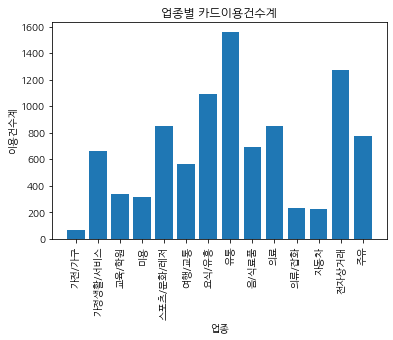

In [43]:
x = df4.groupby(by= '업종대분류(UPJONG_CLASS1)').sum().index
y = df4.groupby(by= '업종대분류(UPJONG_CLASS1)').sum()['카드이용건수계(USECT_CORR)']
plt.title('업종별 카드이용건수계')
plt.xlabel('업종')
plt.xticks(rotation=90)
plt.ylabel('이용건수계')
plt.bar(x,y)
plt.show()

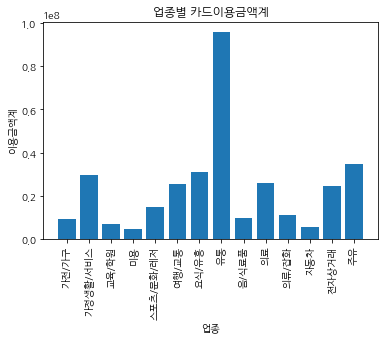

In [60]:
x = df4.groupby(by= '업종대분류(UPJONG_CLASS1)').sum().index
y = df4.groupby(by= '업종대분류(UPJONG_CLASS1)').sum()['카드이용금액계(AMT_CORR)']
plt.title('업종별 카드이용금액계')
plt.xlabel('업종')
plt.xticks(rotation=90)
plt.ylabel('이용금액계')
plt.bar(x,y)
plt.show()

### 4.2 일별 이용건수계와 이용금액계

일별로 보면 카드이용건수와 이용금액이 폭등하는 날이 존재합니다.

상식적인 추측으로는 공휴일이라고 가설을 설정해 볼 수 있습니다.

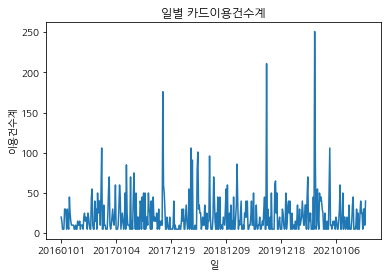

In [104]:
x = df4.groupby(by= '기준일자(YMD)').sum().sort_index().index
y = df4.groupby(by= '기준일자(YMD)').sum().sort_index()['카드이용건수계(USECT_CORR)'].reset_index(drop=True)
values = range(len(x))

plt.title('일별 카드이용건수계')
plt.xlabel('일')
plt.xticks(values,x)
plt.locator_params(axis='x', nbins=len(x)/80)
plt.ylabel('이용건수계')
plt.plot(values,y)
plt.show()

In [59]:
temp = df4.groupby(by= '기준일자(YMD)').sum().sort_index()['카드이용건수계(USECT_CORR)']
temp[temp > 100]

기준일자(YMD)
20160913    106
20171130    176
20180413    106
20180516    101
20190914    211
20200802    251
20201126    106
Name: 카드이용건수계(USECT_CORR), dtype: int64

실제로 가장 많은 251건수 20200802날은 일요일이고,

그 다음으로 많은 211건수 20190914날은 추석연휴 토요일인 것을 확인해 볼 수 있습니다.

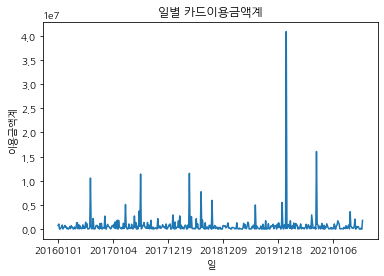

In [105]:
x = df4.groupby(by= '기준일자(YMD)').sum().sort_index().index
y = df4.groupby(by= '기준일자(YMD)').sum().sort_index()['카드이용금액계(AMT_CORR)'].reset_index(drop=True)
values = range(len(x))
plt.title('일별 카드이용금액계')
plt.xlabel('일')
plt.xticks(values,x)
plt.locator_params(axis='x', nbins=len(x)/80)
plt.ylabel('이용금액계')
plt.plot(values,y)
plt.show()

In [108]:
temp = df4.groupby(by= '기준일자(YMD)').sum().sort_index()['카드이용금액계(AMT_CORR)']
temp[temp > 10000000]

기준일자(YMD)
20160625    10559831
20170709    11394962
20180421    11531979
20200209    40847926
20200831    16053798
Name: 카드이용금액계(AMT_CORR), dtype: int64

실제로 가장 많은 40,847,926원 20200209날은 일요일이고,

그 다음으로 많은 16,053,798원 20200831날은 추측과 다르게 월요일이지만 월 말일인 것을 알 수 있습니다.

## 마치며

여러분은 어떤 인사이트를 얻으셨나요?

이번 EDA를 통해 어떤 방식으로 분석 시각화를 진행해야겠다는 참고가 되는 인사이트를 얻으셨으면 좋겠습니다.

여러분도 여러분만의 EDA를 진행하시고 코드공유에 올려주세요!

좋아요와 댓글을 합산하여 가장 높은 점수를 얻으신 분께 데이콘 후드가 제공됩니다!